In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('winequality-red-Tarea-3.csv')
data['calidad']=pd.Categorical(data['quality'].apply(lambda x: 1 if x>5 else 0), categories=[0,1])
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality calidad  
0      9.4        5       0  
1      9.8        5       0  
2      9.8        5       0  
3      9.8        6       1  
4      9.4        5       0

# Reduciendo columnas

## Análisis univariado

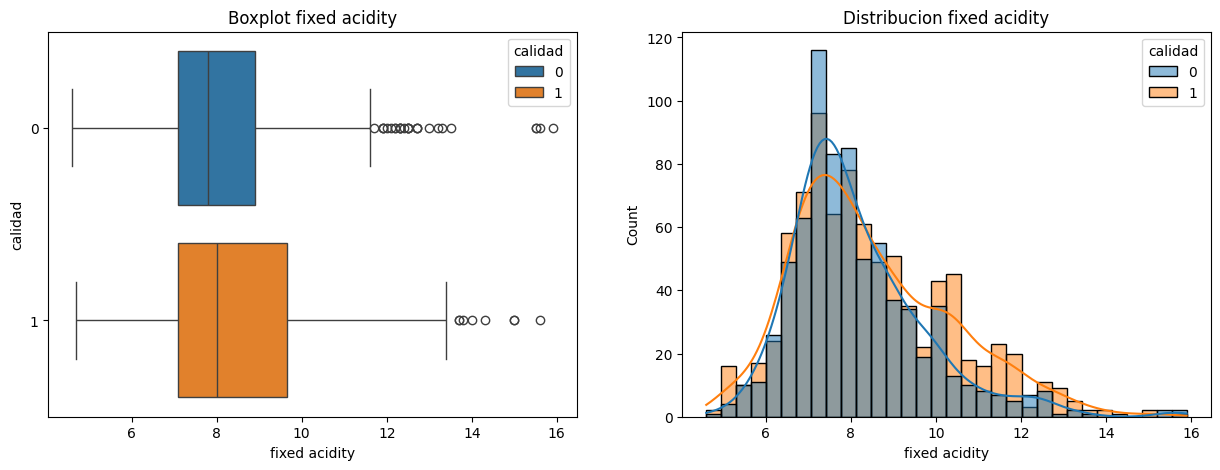

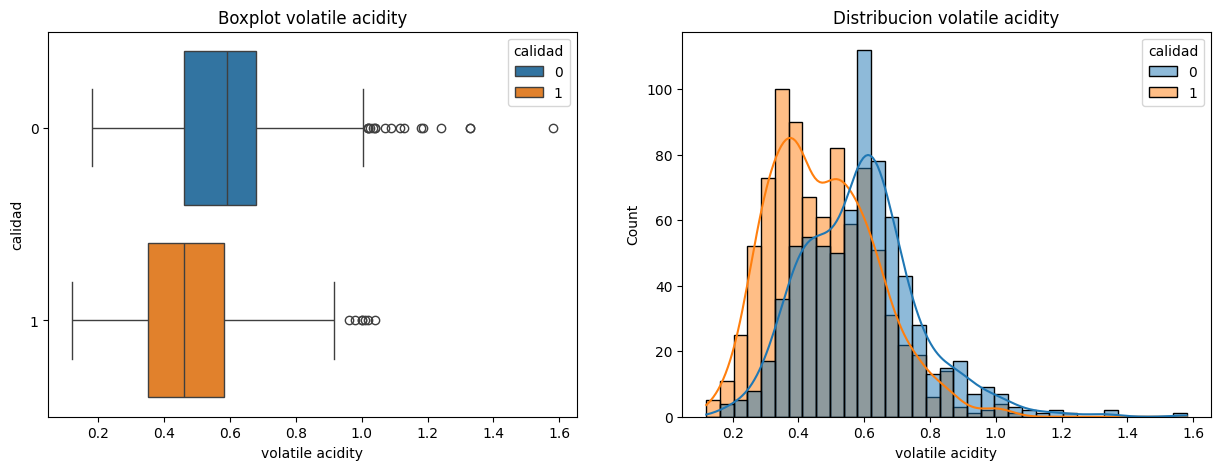

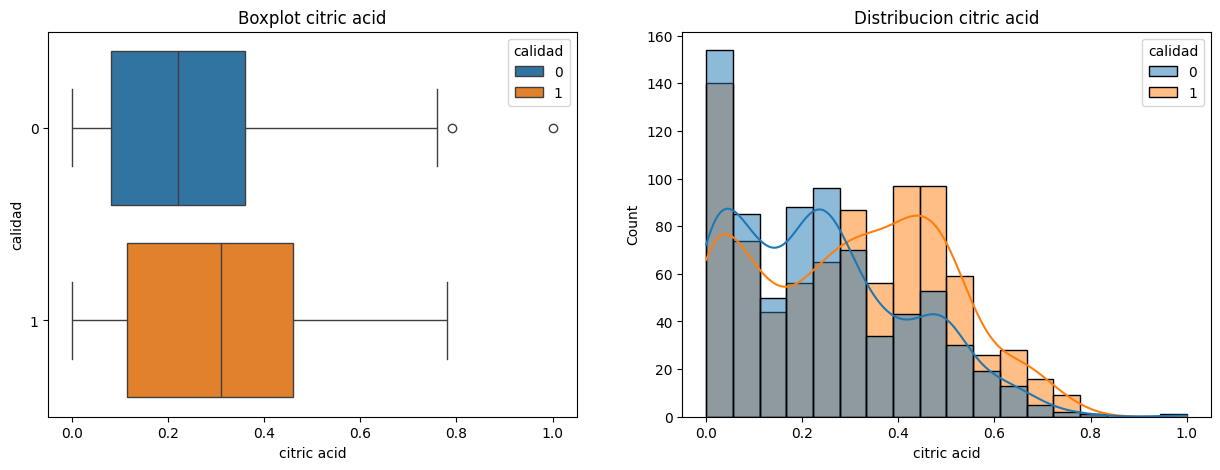

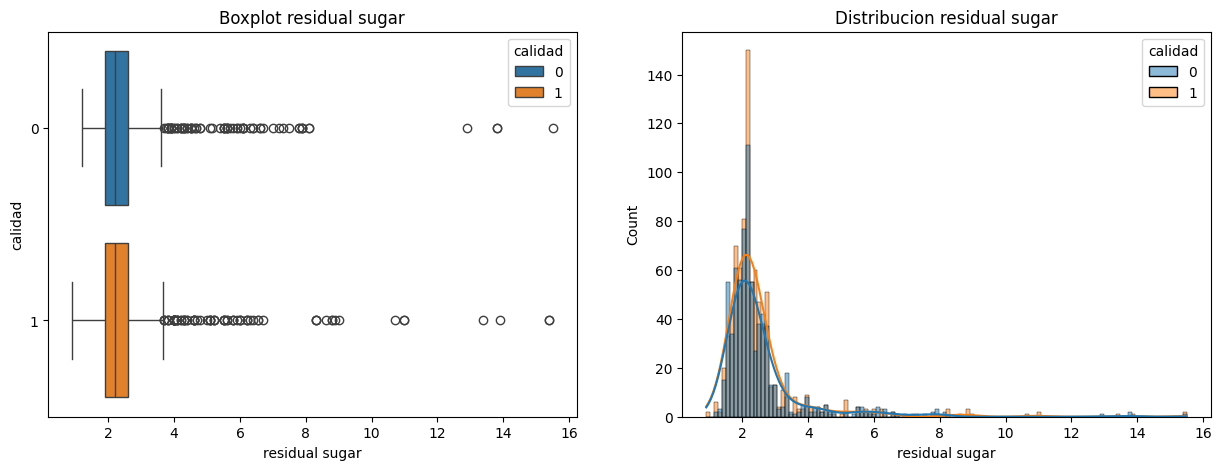

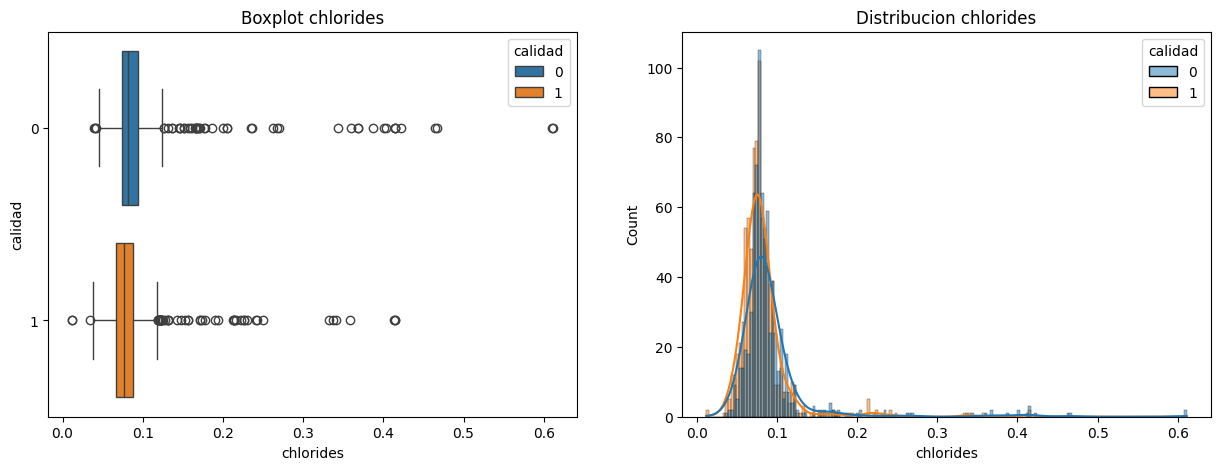

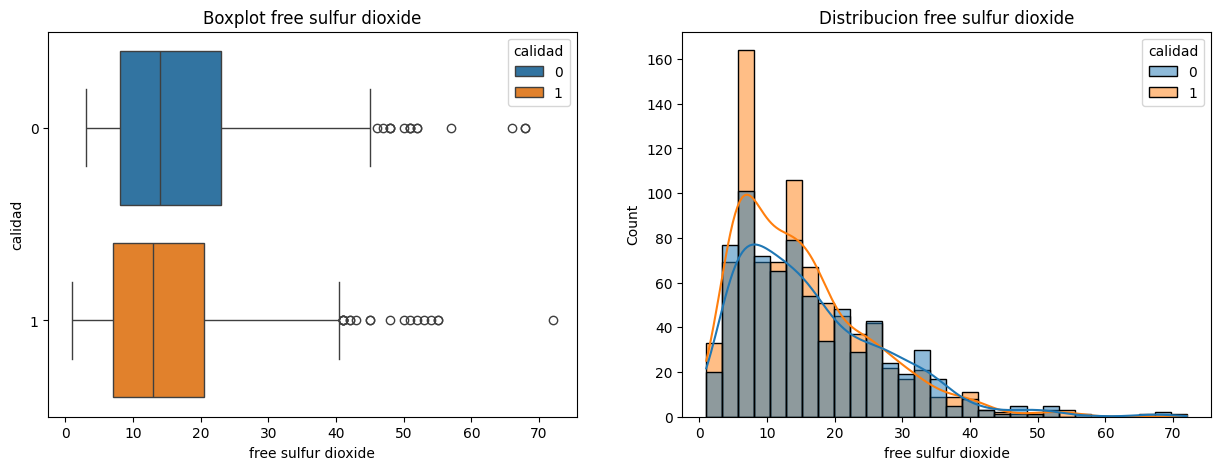

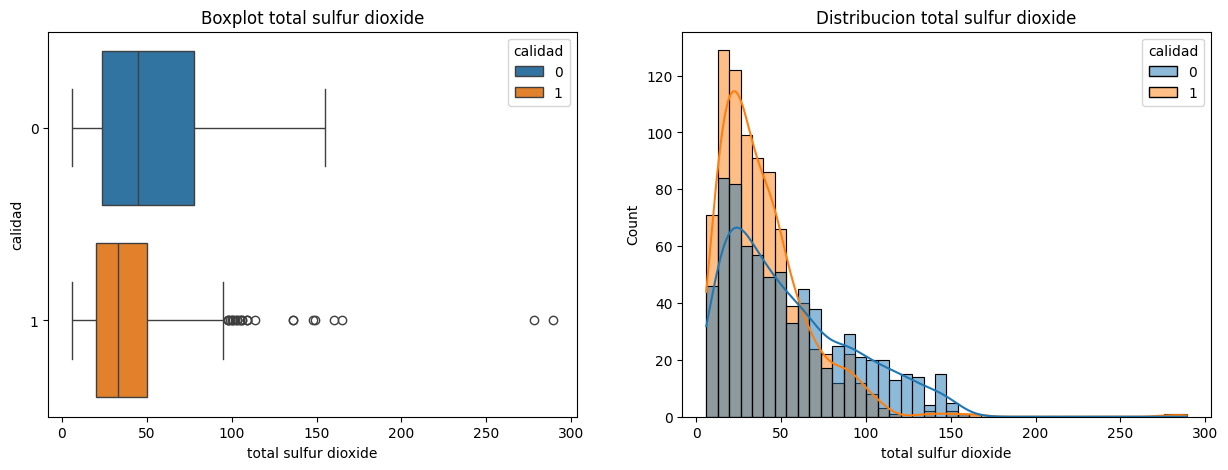

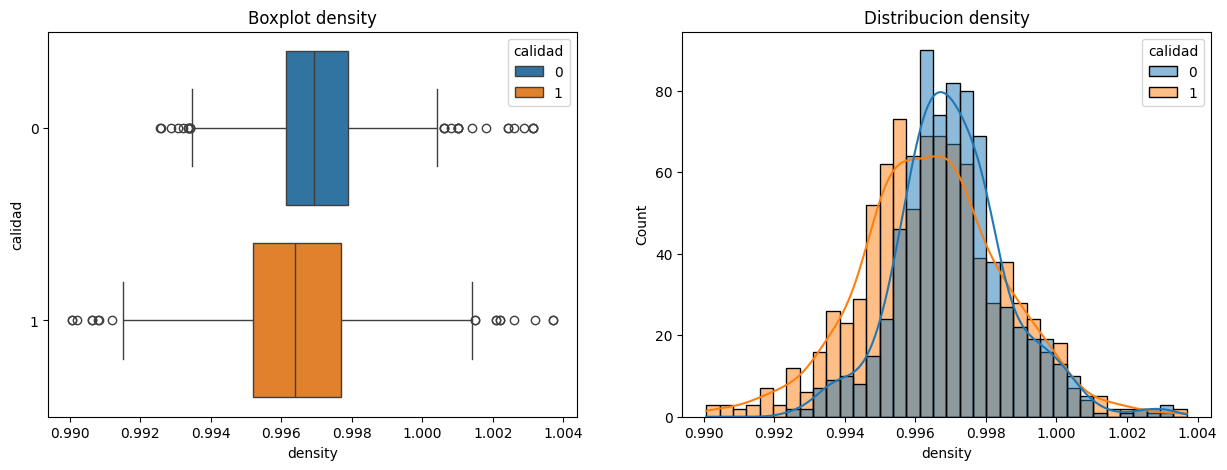

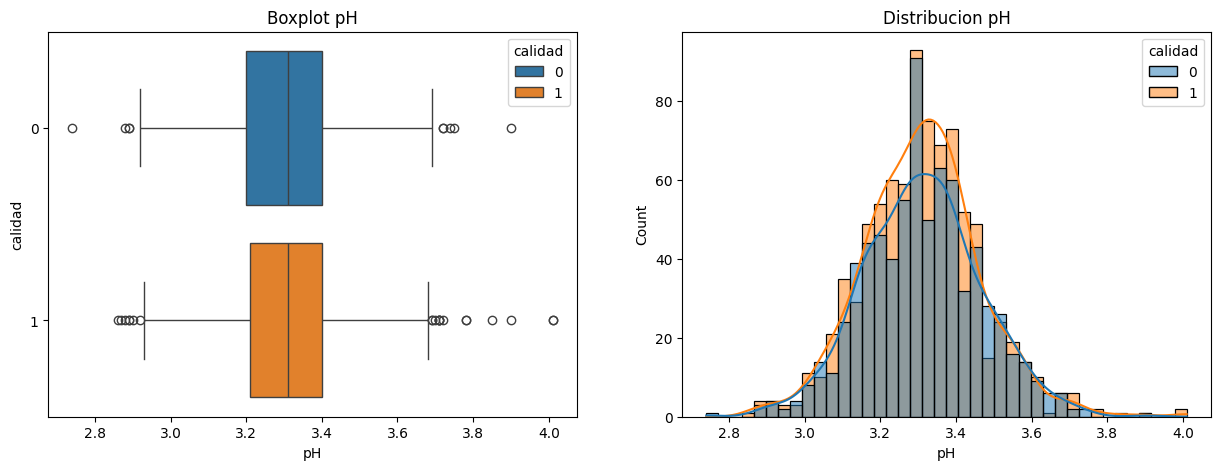

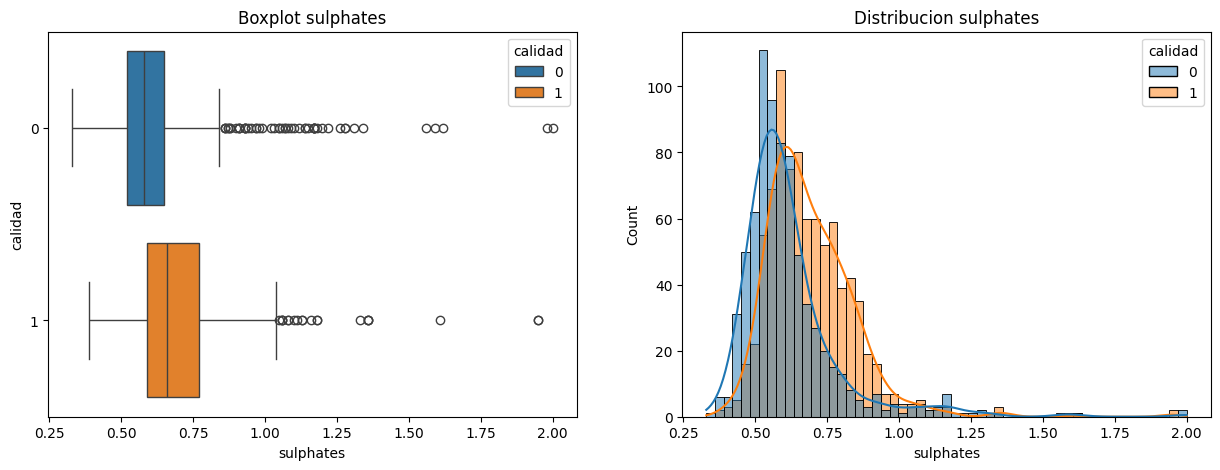

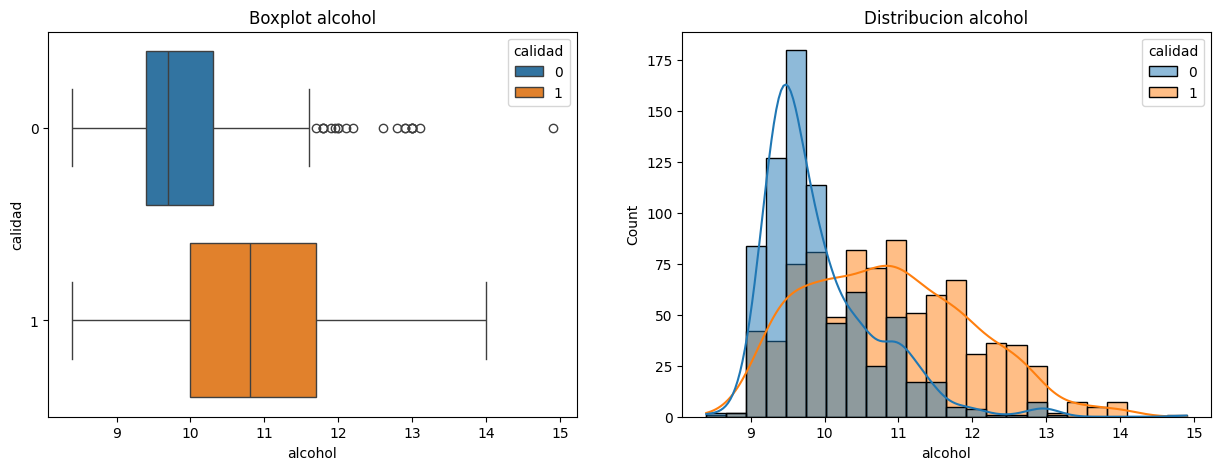

In [3]:
for col in data.columns:
    if col not in ['quality', 'calidad']:
        fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
        sns.boxplot(data=data, x=col, y='calidad', hue='calidad', ax=ax[0])
        sns.histplot(data=data, x=col, hue='calidad',kde=True, ax=ax[1])
        ax[0].set_title(f'Boxplot {col}')
        ax[1].set_title(f'Distribucion {col}')
        plt.show()
        

# Análisis multivariado con matriz de gráficos

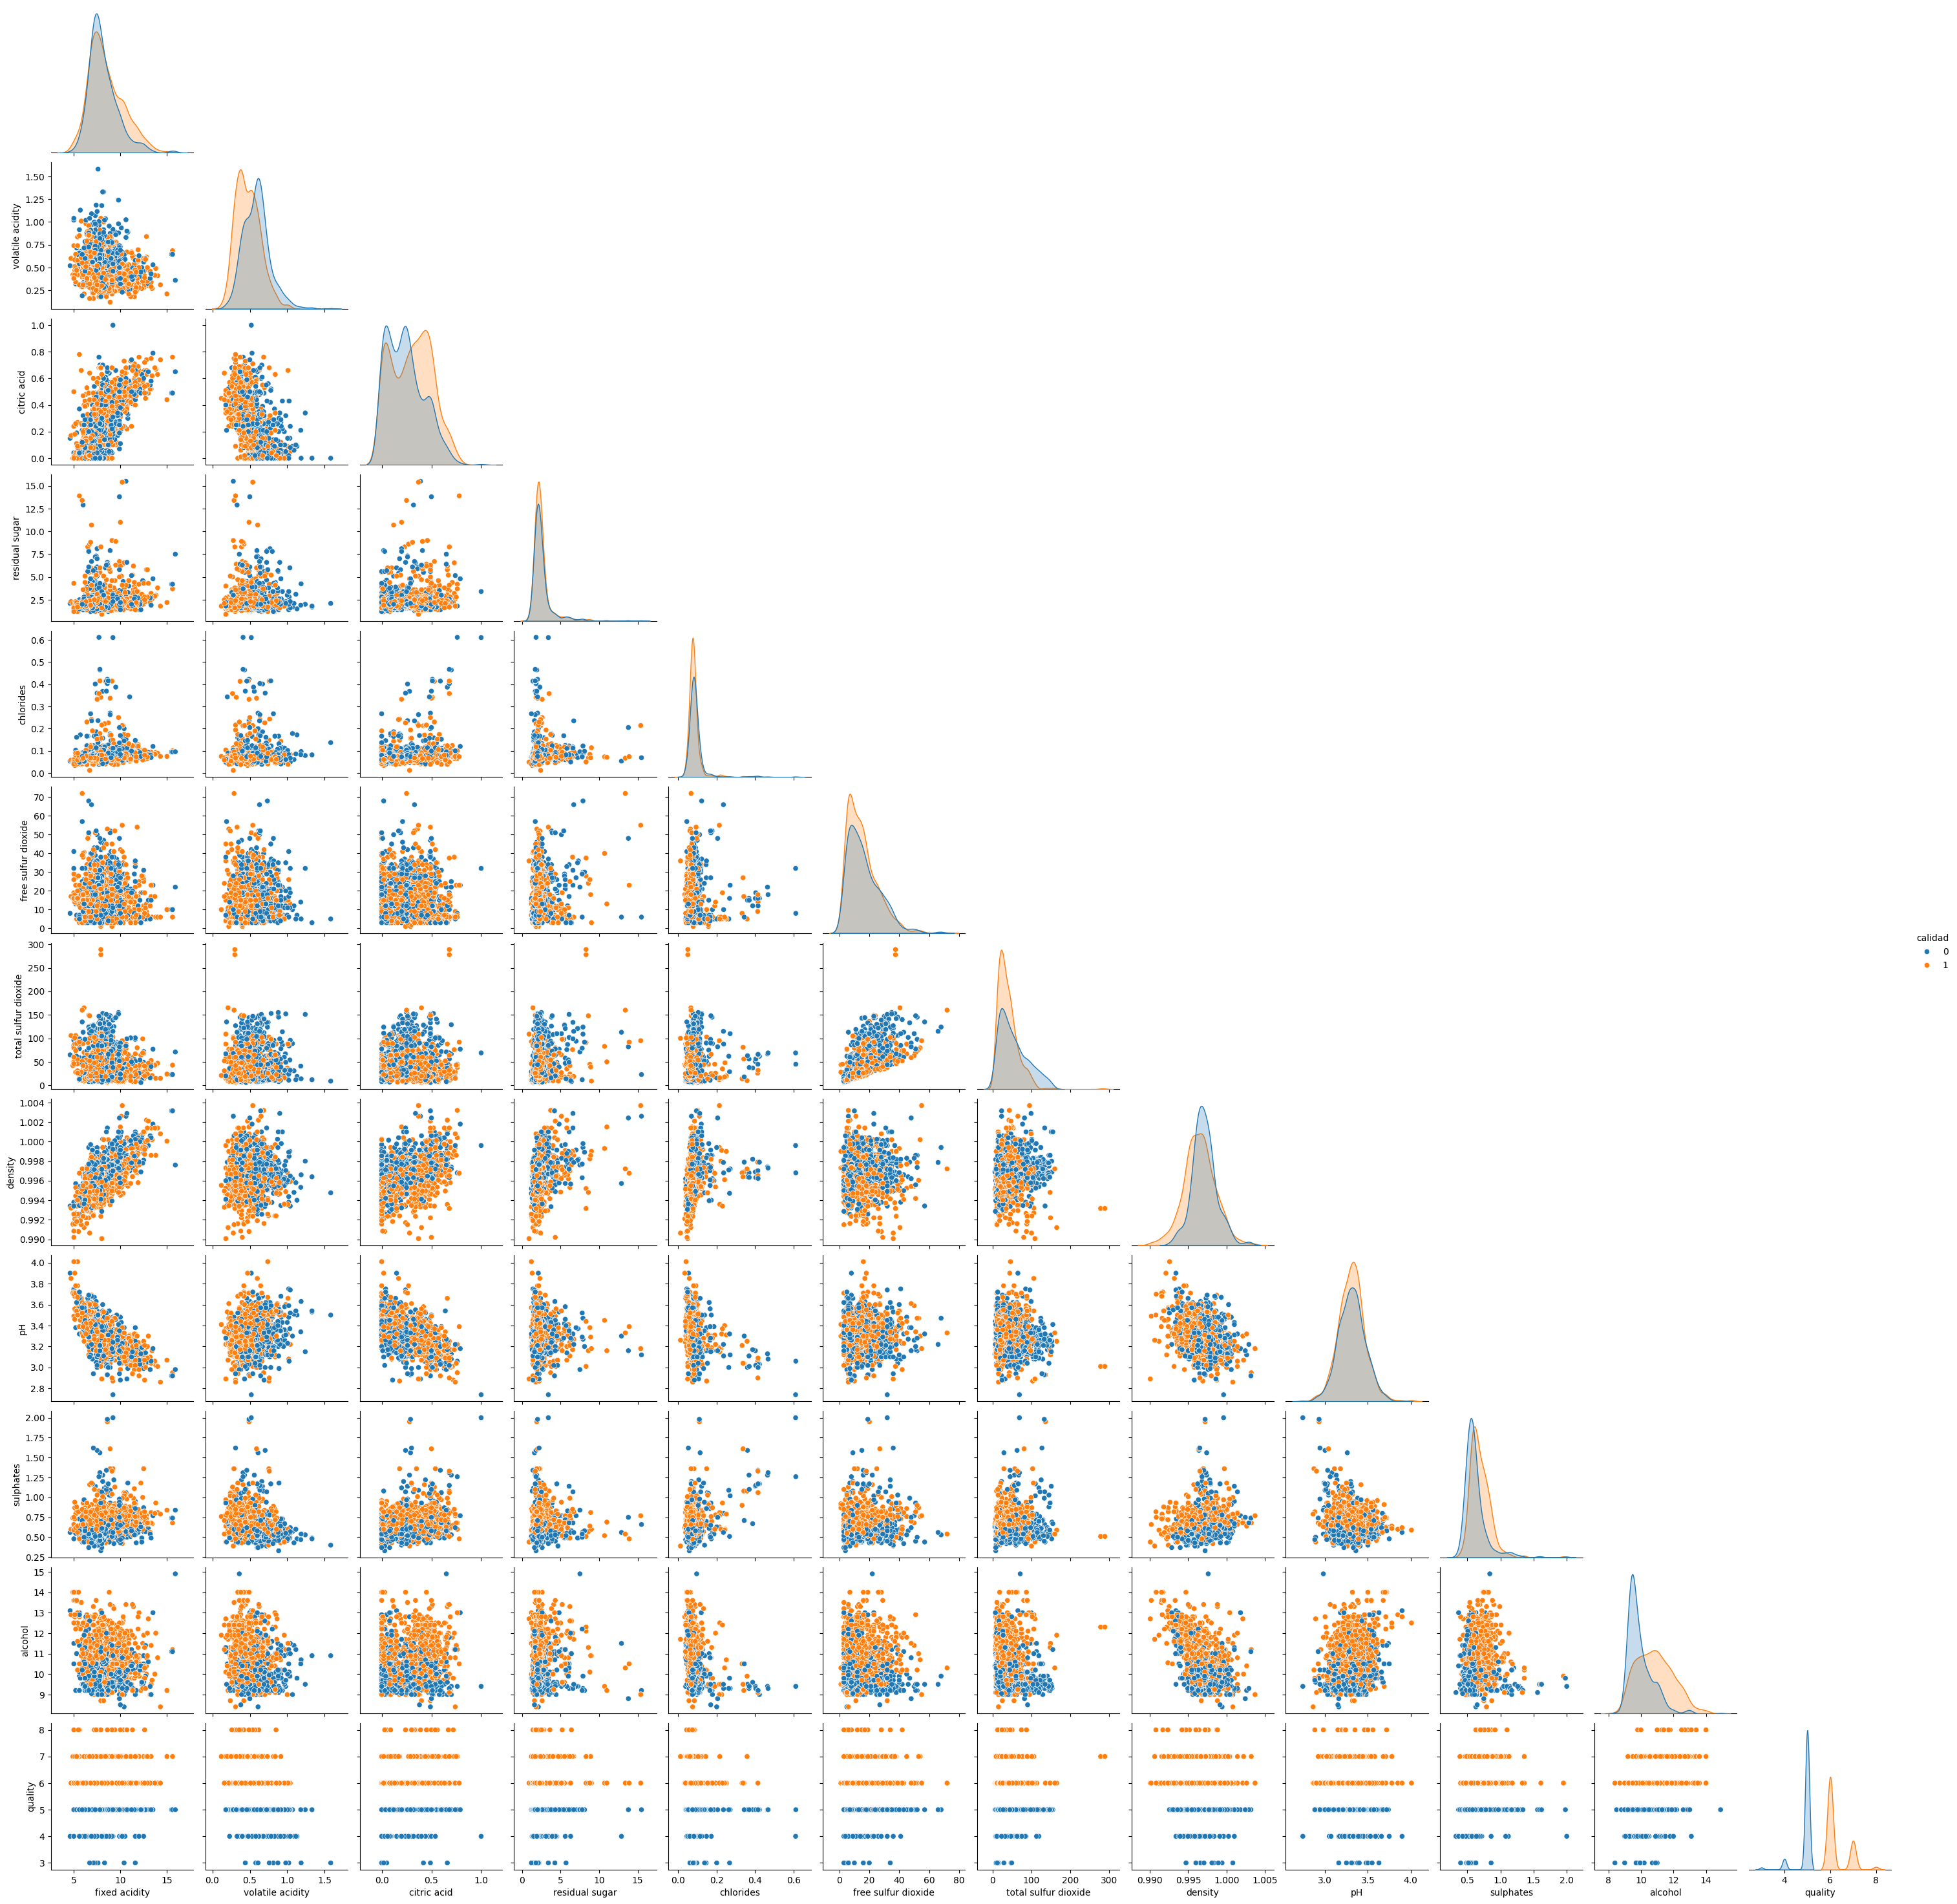

In [15]:
sns.pairplot(data=data, corner=True, hue='calidad')
plt.show()

# Respuesta Pregunta 1

Los 5 pares de variables que mejor separan los vinos de mejor y peor calidad, según un análisis visual con la matriz de gráficos anterior son:
1. ['volatile acidity', 'fixed acidity']
2. ['residual sugar', 'volatile acidity']
3. ['volatile acidity', 'citric acid']
4. ['total sulfur dioxide', 'volatile acidity']
5. ['total sulfur dioxide', 'free sulfur dioxide']


2 pares de columnas que no separan bien los datos:
1. ['ph', 'fixed acidity']
1. ['residual sugar', 'fixed acidity']

# Aplicando PCA

In [54]:
columnas_calidades = ['quality','calidad']
columnas_disminuir = [col for col in data.columns if col not in columnas_calidades]

pca = PCA(n_components=2)

pca_scaler = StandardScaler()

data_pca = data.copy()

data_pca.loc[:, columnas_disminuir] = pd.DataFrame(pca_scaler.fit_transform(data_pca.loc[:, columnas_disminuir]), columns=columnas_disminuir, index=data_pca.index)

data_pca['c1'] = pd.Series([])
data_pca['c2'] = pd.Series([])
data_pca.loc[:, ['c1', 'c2']] = pd.DataFrame(pca.fit_transform(data_pca.loc[:, columnas_disminuir]), columns=['c1', 'c2'], index=data_pca.index)
data_pca

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.466193             -0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol  quality calidad        c1        c2  
0     -0.579207 -0.960246        5       0  -1.61953   0.45095  
1      0.128950 -0.584777        5       0  -0.79917  1.856553  
2     -0.048089 -0.584777        5       0 -0.748479  0.882039  
3     -0.461180 -0.584777        6       1  2.357673 -0.269976  
4     -0.579207 -0.960246        5       0  -1.61953   0.45095  
...         ...       ...      ...     ...       ...       ...  
1594  -0.461180  0.072294        5       0   -2.1505  0.814286  
1595   0.601055  0.729364        6       1 -2.214496  0.893101  
1596   0.542042  0.541630        6       1 -1.456129  0.311746  
1597   0.305990 -0.209308        5       0 -2.270518  0.979791  
1598   0.010924  0.541630        6       1 -0.426975  -0.53669  

[1599 rows x 15 columns]

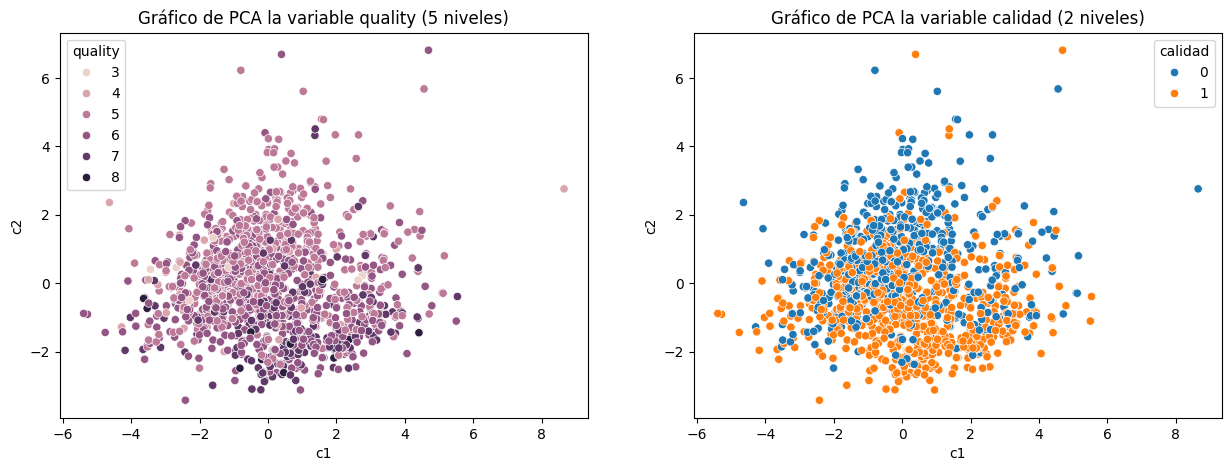

0.4568220118429404


In [55]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

sns.scatterplot(data=data_pca, x='c1', y='c2', hue='quality', ax=axs[0])
sns.scatterplot(data=data_pca, x='c1', y='c2', hue='calidad', ax=axs[1])

axs[0].set_title('Gráfico de PCA la variable quality (5 niveles)')
axs[1].set_title('Gráfico de PCA la variable calidad (2 niveles)')
plt.show()

print(pca.explained_variance_ratio_.sum())

Podemos observar que valores altores de la calidad de los vinos se concentran en valores altos de c2 para ambos gráficos

# Aplicando t-SNE

In [56]:
columnas_calidades = ['quality','calidad']
columnas_disminuir = [col for col in data.columns if col not in columnas_calidades]



data_tsne = data.copy()

tsne_scaler = StandardScaler()

data_tsne = data.copy()


data_tsne.loc[:, columnas_disminuir] = pd.DataFrame(tsne_scaler.fit_transform(data_tsne.loc[:, columnas_disminuir]), columns=columnas_disminuir, index=data_tsne.index)

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300, learning_rate='auto', init='random')
data_tsne['c1'] = pd.Series([])
data_tsne['c2'] = pd.Series([])
data_tsne.loc[:, ['c1', 'c2']] = pd.DataFrame(tsne.fit_transform(data_tsne.loc[:, columnas_disminuir]), columns=['c1', 'c2'], index=data_tsne.index)
data_tsne

e:\ds_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1599 samples in 0.003s...
[t-SNE] Computed neighbors for 1599 samples in 0.070s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1599
[t-SNE] Computed conditional probabilities for sample 1599 / 1599
[t-SNE] Mean sigma: 0.856448
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.969246
[t-SNE] KL divergence after 300 iterations: 1.556609


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.466193             -0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol  quality calidad        c1        c2  
0     -0.579207 -0.960246        5       0 -3.718079  7.004902  
1      0.128950 -0.584777        5       0   0.42677  7.385044  
2     -0.048089 -0.584777        5       0  0.276042  6.945261  
3     -0.461180 -0.584777        6       1  5.268821 -3.340163  
4     -0.579207 -0.960246        5       0 -3.717978  7.004913  
...         ...       ...      ...     ...       ...       ...  
1594  -0.461180  0.072294        5       0 -7.126458 -0.649017  
1595   0.601055  0.729364        6       1 -6.467257 -1.452412  
1596   0.542042  0.541630        6       1 -6.401826 -1.156963  
1597   0.305990 -0.209308        5       0 -7.160444 -1.061926  
1598   0.010924  0.541630        6       1 -2.731554 -3.882873  

[1599 rows x 15 columns]

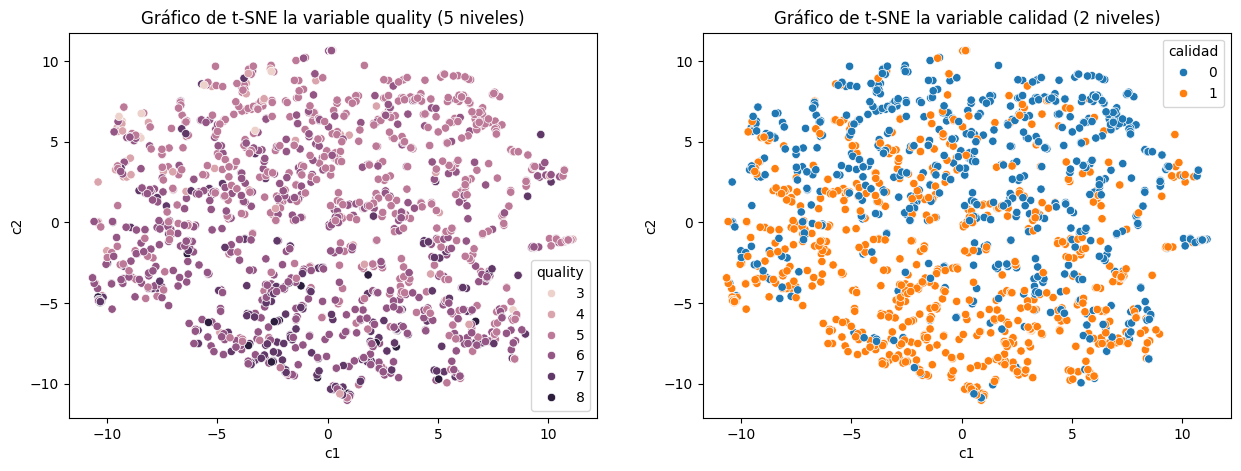

In [57]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

sns.scatterplot(data=data_tsne, x='c1', y='c2', hue='quality', ax=axs[0])
sns.scatterplot(data=data_tsne, x='c1', y='c2', hue='calidad', ax=axs[1])

axs[0].set_title('Gráfico de t-SNE la variable quality (5 niveles)')
axs[1].set_title('Gráfico de t-SNE la variable calidad (2 niveles)')
plt.show()

Podemos observar la misma concentración de vinos de calidad en valores bajos de c2

e:\ds_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
e:\ds_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
e:\ds_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
e:\ds_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
e:\ds_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
e:\ds_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed

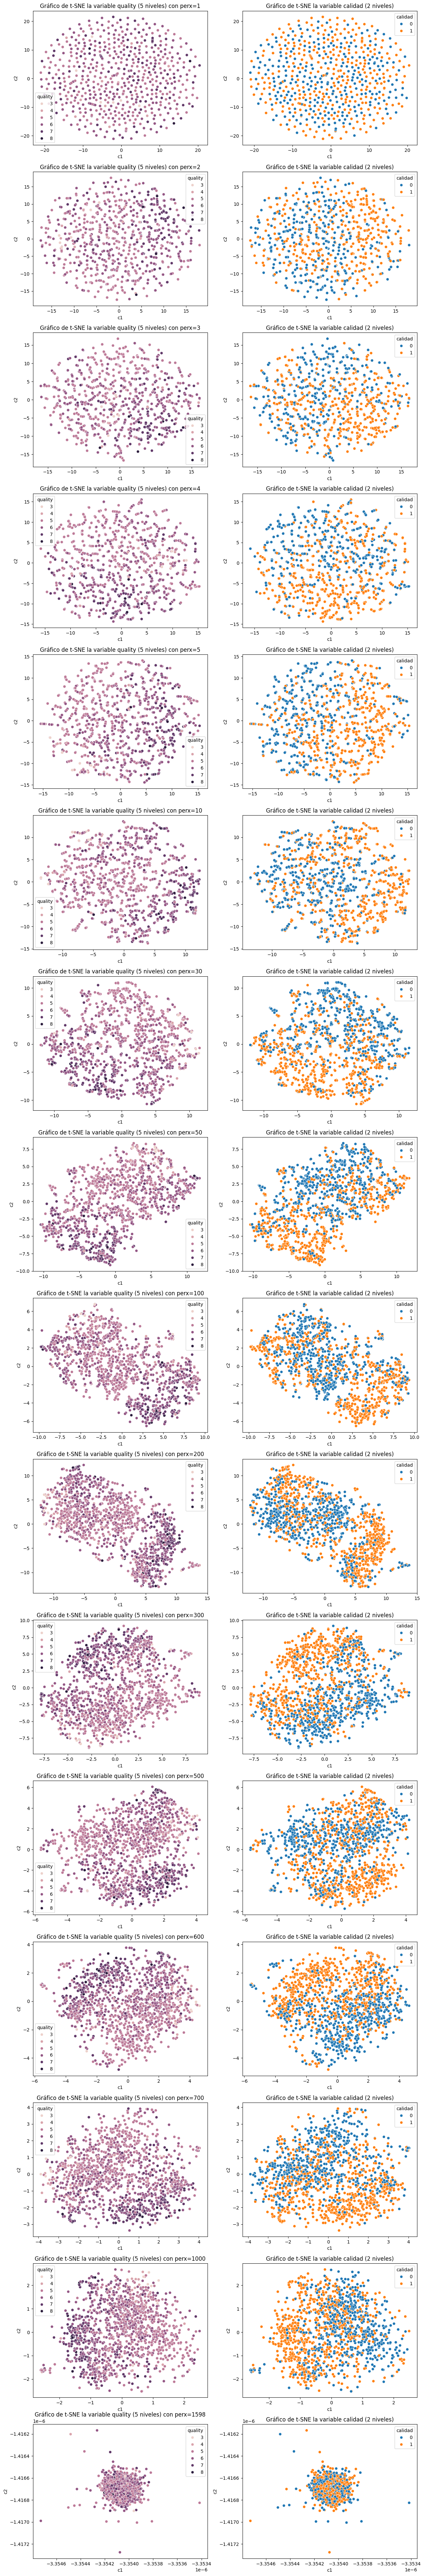

In [64]:
perx_to_test = [1,2,3,4,5, 10, 30, 50, 100, 200, 300,500, 600, 700, 1000, len(data_tsne)-1]

fig, axs = plt.subplots(ncols=2, nrows=len(perx_to_test), figsize=(15,100))

for i, perx in enumerate(perx_to_test):


    tsne = TSNE(n_components=2, perplexity=perx, n_iter=300, learning_rate='auto', init='random')
    data_tsne['c1'] = pd.Series([])
    data_tsne['c2'] = pd.Series([])
    data_tsne.loc[:, ['c1', 'c2']] = pd.DataFrame(tsne.fit_transform(data_tsne.loc[:, columnas_disminuir]), columns=['c1', 'c2'], index=data_tsne.index)
    

    

    sns.scatterplot(data=data_tsne, x='c1', y='c2', hue='quality', ax=axs[i, 0])
    sns.scatterplot(data=data_tsne, x='c1', y='c2', hue='calidad', ax=axs[i,1])

    axs[i,0].set_title(f'Gráfico de t-SNE la variable quality (5 niveles) con perx={perx}')
    axs[i,1].set_title('Gráfico de t-SNE la variable calidad (2 niveles)')
plt.show()